## Modelo Montecarlo para el juego de "Los 3 chanchitos y el lobo"

##### Lógica del juego: Se tiene que armar una casita de 5 partes en base de como sale un dado. 1 = Frente; 2 = Fondo; 3 y 4 = laterales; 5 = techo; y 6 = lobo. Se tira el dado hasta que alguien saque 1 y se arranca. Cada jugador coloca una pieza de la casa a medida que sale su numero, si el numero ya salio se pierde el turno. Si sale el 5, el techo, y no salieron del 1 al 4 antes, pierdo el turno. Si sale 6, el lobo, se quita una de las piezas ya colocadas.

#### Simulador del juego para 4 jugadores

In [ ]:
import random
import numpy as np

def tres_chanchitos(num_jugadores):
    lanzamientos = 0
    numeros_lanzados = [set() for _ in range(num_jugadores)]
    ultimo_lanzamiento = [None] * num_jugadores
    while True:
        # Lanzamiento para cada jugador
        for i in range(num_jugadores):
            lanzamiento = np.random.randint(1, 7)
            if lanzamiento == 6 and numeros_lanzados[i]: # Si es 6, descarta el último lanzamiento
                numeros_lanzados[i].discard(ultimo_lanzamiento[i])
            elif lanzamiento == 5 and numeros_lanzados[i].issuperset({1, 2, 3, 4}): # Si es 5 y ya tiene 1-4, lo agrega
                numeros_lanzados[i].add(lanzamiento)
                ultimo_lanzamiento[i] = lanzamiento
                lanzamientos += 1
            elif lanzamiento in range(1, 5): # Si es un número entre 1-4
                if lanzamiento not in numeros_lanzados[i]: # Si no se ha lanzado antes, lo agrega
                    numeros_lanzados[i].add(lanzamiento)
                    ultimo_lanzamiento[i] = lanzamiento
                if lanzamiento in numeros_lanzados[i]:
                  continue
        # Verifica si algún jugador ha terminado
        if any(len(s) == 5 for s in numeros_lanzados):
            break
        lanzamientos += 1

    return lanzamientos

num_jugadores = 4
num_simulaciones = 5000
resultados = [tres_chanchitos(num_jugadores) for _ in range(num_simulaciones)]
promedio_lanzamientos = np.mean(resultados)
min_lanzamientos = np.min(resultados)
max_lanzamientos = np.max(resultados)
desviacion_estandar_lanzamientos = np.std(resultados)

print(f"Promedio de lanzamientos para {num_jugadores} jugadores: {promedio_lanzamientos:.2f}")
print(f"Lanzamientos mínimos para {num_jugadores} jugadores: {min_lanzamientos}")
print(f"Lanzamientos máximos para {num_jugadores} jugadores: {max_lanzamientos}")
print(f"Desviación estándar para {num_jugadores} jugadores: {desviacion_estandar_lanzamientos:.2f}")

Promedio de lanzamientos para 4 jugadores: 14.49
Lanzamientos mínimos para 4 jugadores: 5
Lanzamientos máximos para 4 jugadores: 50
Desviación estándar para 4 jugadores: 6.22


#### Historgrama para visualizar la cantidad de tiradas hasta ganar

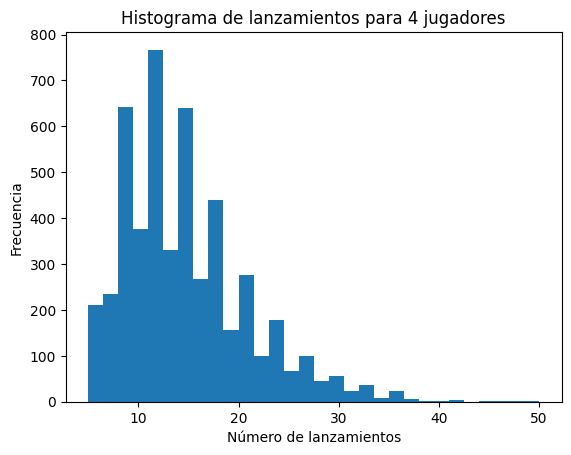

In [ ]:
import matplotlib.pyplot as plt

plt.hist(resultados, bins=30)
plt.xlabel('Número de lanzamientos')
plt.ylabel('Frecuencia')
plt.title(f'Histograma de lanzamientos para {num_jugadores} jugadores')
plt.show()

#### Genero una función de densidad

<ipython-input-3-d45d8f7fd6ca>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resultados, shade=True)


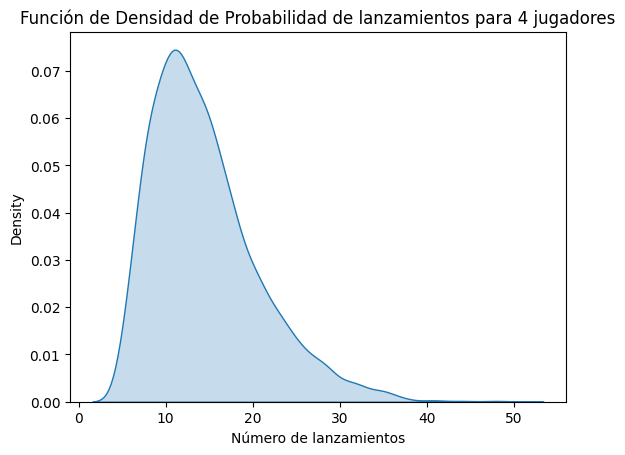

In [ ]:
import seaborn as sns

sns.kdeplot(resultados, shade=True)
plt.xlabel('Número de lanzamientos')
plt.title(f'Función de Densidad de Probabilidad de lanzamientos para {num_jugadores} jugadores')
plt.show()

#### Grafico las distribuciones (normal, lognormal, pareto y gamma) ensima de la funcion de densidad

C:\Users\paula\AppData\Local\Temp\ipykernel_8876\2885367996.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resultados, shade=True, color='blue', label='Original')


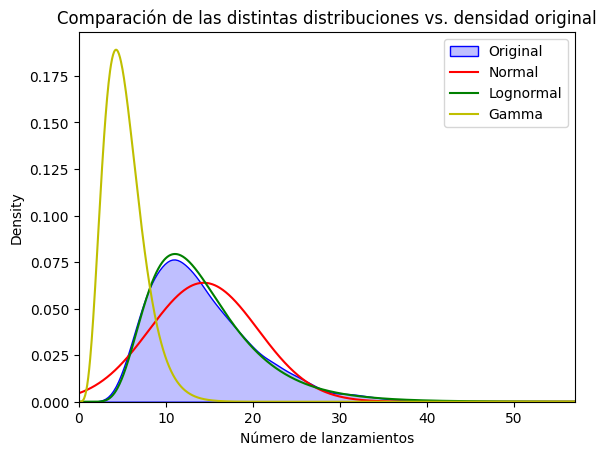

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, lognorm, gamma

# Función de densidad original
sns.kdeplot(resultados, shade=True, color='blue', label='Original')

# Rango de valores para el eje x
x = np.linspace(0, max(resultados), 1000)

# Parámetros de las distribuciones
mu, sigma = np.mean(resultados), np.std(resultados)  # Parámetros para la distribución normal
s = np.std(np.log(resultados)), np.mean(np.log(resultados))  # Parámetros para la distribución log-normal
a = np.mean(resultados)**2 / np.var(resultados)  # Parámetro de forma para la distribución gamma

# Graficar las distribuciones
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal')  # Distribución normal
plt.plot(x, lognorm.pdf(x, s[0], scale=np.exp(s[1])), 'g-', label='Lognormal')  # Distribución log-normal
plt.plot(x, gamma.pdf(x, a), 'y-', label='Gamma')  # Distribución gamma

# Ajustar límites de los ejes
plt.xlim(0, max(resultados))

plt.xlabel('Número de lanzamientos')
plt.title('Comparación de las distintas distribuciones vs. densidad original')
plt.legend()
plt.show()

#### Pruebo test para ver a que distribución se parece

In [ ]:
from scipy.stats import normaltest, kstest, shapiro

# Test de bondad de ajuste para distribución normal
statistic_normal, p_value_normal = normaltest(resultados)
print("Test de bondad de ajuste para distribución normal:")
print(f"Estadístico de prueba: {statistic_normal}")
print(f"P-valor: {p_value_normal}")
if p_value_normal < 0.05:
    print("Los datos no se ajustan a una distribución normal")
else:
    print("Los datos se ajustan a una distribución normal")

# Test de bondad de ajuste Kolmogorov-Smirnov para distribución log-normal
statistic_lognormal, p_value_lognormal = kstest(resultados, 'lognorm', args=s)
print("\nTest de bondad de ajuste para distribución log-normal:")
print(f"Estadístico de prueba: {statistic_lognormal}")
print(f"P-valor: {p_value_lognormal}")
if p_value_lognormal < 0.05:
    print("Los datos no se ajustan a una distribución log-normal")
else:
    print("Los datos se ajustan a una distribución log-normal")

# Test de bondad de ajuste Shapiro-Wilk para distribución gamma
statistic_gamma, p_value_gamma = shapiro(resultados)
print("\nTest de bondad de ajuste para distribución gamma:")
print(f"Estadístico de prueba: {statistic_gamma}")
print(f"P-valor: {p_value_gamma}")
if p_value_gamma < 0.05:
    print("Los datos no se ajustan a una distribución gamma")
else:
    print("Los datos se ajustan a una distribución gamma")

Test de bondad de ajuste para distribución normal:
Estadístico de prueba: 1148.916195193245
P-valor: 3.2810898937742037e-250
Los datos no se ajustan a una distribución normal

Test de bondad de ajuste para distribución log-normal:
Estadístico de prueba: 0.9834199798256719
P-valor: 0.0
Los datos no se ajustan a una distribución log-normal

Test de bondad de ajuste para distribución gamma:
Estadístico de prueba: 0.9183431267738342
P-valor: 1.401298464324817e-45
Los datos no se ajustan a una distribución gamma


#### QQ-Plots para comparar la distribución original con la normal, log-normal y gamma

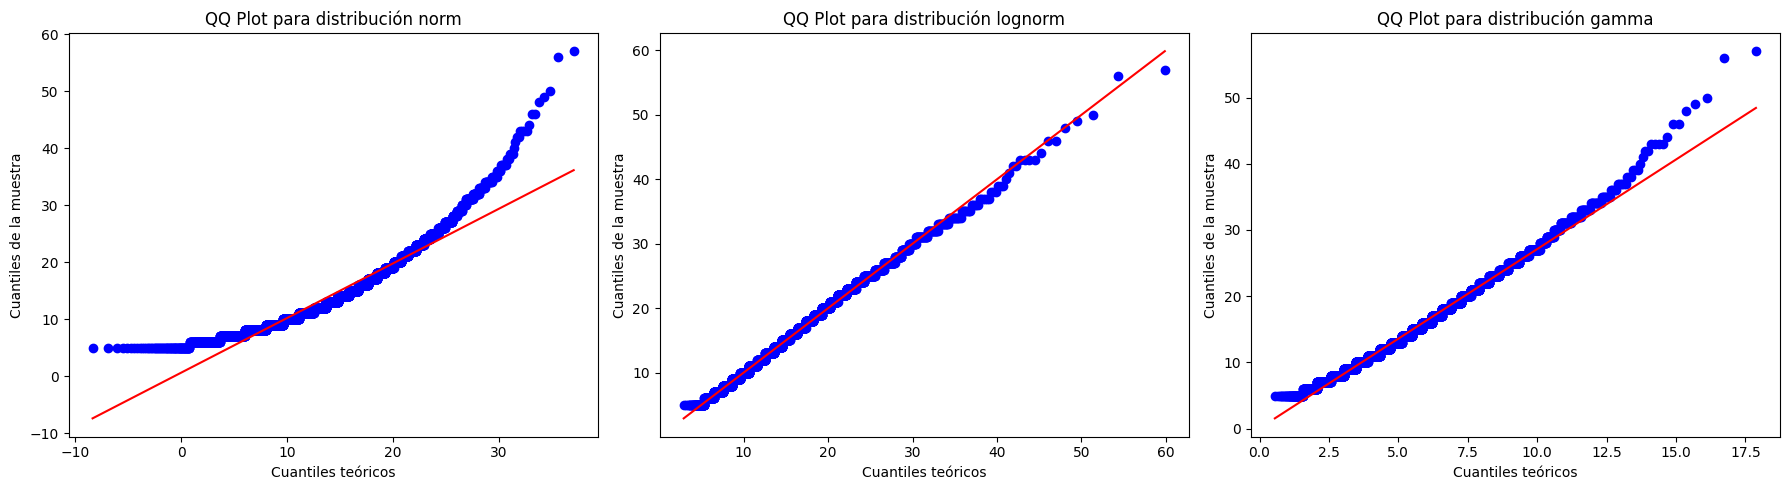

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Datos originales
data = resultados

# Distribuciones de referencia
distributions = ['norm', 'lognorm', 'gamma']
parameters = [(mu, sigma), (s[0], 0, np.exp(s[1])), (a, 0, 1)]

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Graficar qq plots para cada distribución
for i, (dist, params) in enumerate(zip(distributions, parameters)):
    ax = axes[i]
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f'QQ Plot para distribución {dist}')
    ax.set_xlabel('Cuantiles teóricos')
    ax.set_ylabel('Cuantiles de la muestra')

plt.tight_layout()
plt.show()

#### Cantidad de rondas del juego segun la cantidad de jugadores

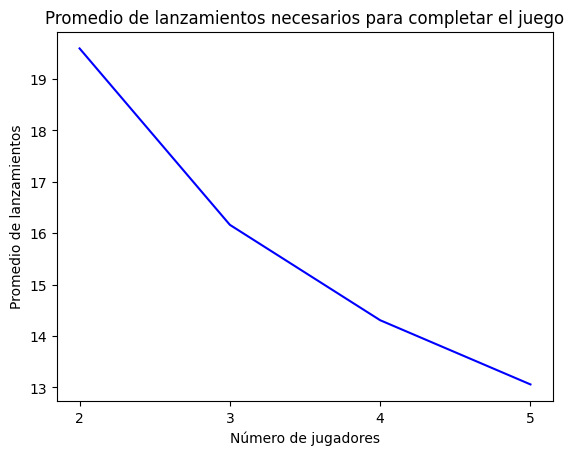

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_jugadores = [2, 3, 4, 5]
num_simulaciones = 5000

promedio_lanzamientos = []
for num in num_jugadores:
    resultados = [tres_chanchitos(num) for _ in range(num_simulaciones)]
    promedio_lanzamientos.append(np.mean(resultados))

# Gráfico de los resultados
plt.plot(num_jugadores, promedio_lanzamientos, 'b')
plt.xticks(num_jugadores)  # Establecer los ticks del eje x como los números de jugadores
plt.xlabel('Número de jugadores')
plt.ylabel('Promedio de lanzamientos')
plt.title('Promedio de lanzamientos necesarios para completar el juego')
plt.show()

#### Boxplots para 2 a 10 jugadores

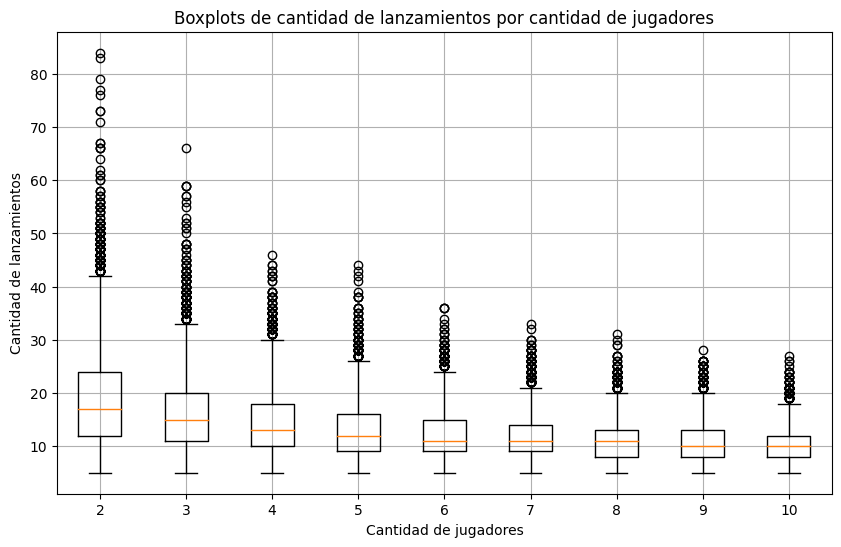

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para simular el juego de dados con un número específico de jugadores
def simulate_dice_game(num_players):
    lanzamientos = []
    for _ in range(5000):
        # Simular juego para 5000 partidas
        lanzamientos.append(tres_chanchitos(num_players))
    return lanzamientos

# Generar datos para cada cantidad de jugadores
num_jugadores = range(2, 11)
datos = [simulate_dice_game(num) for num in num_jugadores]

# Crear boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(datos, labels=[str(num) for num in num_jugadores])
plt.xlabel('Cantidad de jugadores')
plt.ylabel('Cantidad de lanzamientos')
plt.title('Boxplots de cantidad de lanzamientos por cantidad de jugadores')
plt.grid(True)
plt.show()